# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# What does each column mean?
# 1) FRESH: annual spending (m.u.) on fresh products (Continuous)
# 2) MILK: annual spending (m.u.) on milk products (Continuous)
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous)
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
# 7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
# 8) REGION: customers Region: Lisnon, Oporto or Other (Nominal)

In [23]:
customers.shape

(440, 8)

In [4]:
# Any categorical data to convert?
customers.dtypes # Any.

# Channel and region are actually categorical.

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
# Any missing data to remove?
customers.isnull().sum() # Any.

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [20]:
# Column collinearity - any high correlations?
corrMatrix = customers.corr()
corrMatrix[corrMatrix > 0.8]
# Detergents_Paper and Grocery are quite correlated.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Grocery,NaN,NaN,NaN,NaN,1.000000,NaN,0.924641,NaN
Frozen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,0.924641,NaN,1.000000,NaN
Delicassen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
# Descriptive statistics:
stats = customers.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0,1.00
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0,1.00
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.00
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,8502.75
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00


In [40]:
# Any outliers to remove?

# Selecting only rows where the values of all columns are within 3 standard deviations from column mean:
# customers[customers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

# Or the other way around: len(outliers):
len(customers[~customers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)])

26

In [42]:
# Column-wise data distribution - is the distribution skewed?

# Skewness is a statistical measure that quantifies the symmetry of the distribution. 
# A positively skewed distribution has a long tail on the right side and negatively skewed 
# distribution has a long tail on the left side.

# A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
# A negative skewness value in the output indicates an asymmetry in the distribution: tail
# larger towards the left hand side of the distribution.
# A positive skewness value in the output indicates an asymmetry in the distribution: tail
# larger towards the right hand side of the distribution.

customers.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

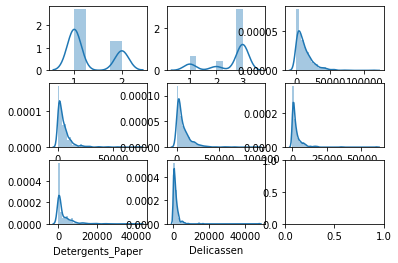

In [50]:
import seaborn as sns
fig, axes = plt.subplots(ncols=3, nrows=3)
for e, ax in zip(customers.columns,axes.flat):
    sns.distplot(customers[e], ax=ax)
plt.show()

# Most of columns have asymmetry in the distribution (a positive skewness value) with the tail
# larger towards the right hand side of the distribution.

In [ ]:
# Your observations here
# Channel and region are actually categorical variables.
# There are some outliers, but I don't think it's convenient to eliminate those rows, because
# they are not wrong: Sales distribution is probably like that.
# Detergents_Paper and Grocery are quite correlated. We can drop one of the columns.
# We should also standardize the features in some manner.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [53]:
# Detergents_Paper and Grocery are quite correlated. We can drop one of the columns.
customers_cleaned = customers.drop('Grocery', axis=1)

In [54]:
corrMatrix = customers_cleaned.corr()
corrMatrix[corrMatrix > 0.8]

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
Channel,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Fresh,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Milk,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Frozen,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Detergents_Paper,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Delicassen,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [55]:
# Channel and region are actually categorical variables.
customers_cleaned = pd.get_dummies(customers_cleaned,columns = ["Channel", "Region"])
customers_cleaned.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,214,2674,1338,0,1,0,0,1
1,7057,9810,1762,3293,1776,0,1,0,0,1
2,6353,8808,2405,3516,7844,0,1,0,0,1
3,13265,1196,6404,507,1788,1,0,0,0,1
4,22615,5410,3915,1777,5185,0,1,0,0,1


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [60]:
# Your import here:
from sklearn.preprocessing import StandardScaler
# Your code here:
scaler = StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers_cleaned), 
                               columns=customers_cleaned.columns)
customers_scale.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.589367,-0.043569,-0.066339,-1.448652,1.448652,-0.460566,-0.345822,0.626422
1,-0.391302,0.544458,-0.270136,0.086407,0.089151,-1.448652,1.448652,-0.460566,-0.345822,0.626422
2,-0.447029,0.408538,-0.137536,0.133232,2.243293,-1.448652,1.448652,-0.460566,-0.345822,0.626422
3,0.100111,-0.624020,0.687144,-0.498588,0.093411,0.690297,-0.690297,-0.460566,-0.345822,0.626422
4,0.840239,-0.052396,0.173859,-0.231918,1.299347,-1.448652,1.448652,-0.460566,-0.345822,0.626422


In [64]:
print(round(customers_scale.mean())) # mean=0
print(round(customers_scale.std())) # std=1

Fresh              -0.0
Milk               -0.0
Frozen              0.0
Detergents_Paper   -0.0
Delicassen         -0.0
Channel_1           0.0
Channel_2          -0.0
Region_1            0.0
Region_2            0.0
Region_3            0.0
dtype: float64
Fresh               1.0
Milk                1.0
Frozen              1.0
Detergents_Paper    1.0
Delicassen          1.0
Channel_1           1.0
Channel_2           1.0
Region_1            1.0
Region_2            1.0
Region_3            1.0
dtype: float64


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [68]:
# Your code here:
from sklearn.cluster import KMeans
kMeansModel = KMeans(n_clusters=4)
datafit = kMeansModel.fit(customers_scale) # .fit_predict
customers['labels'] = datafit.labels_

Count the values in `labels`.

In [69]:
# Your code here:
customers['labels'].value_counts()

0    210
1    112
2     72
3     46
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [71]:
# Your code here
from sklearn.cluster import DBSCAN
DBSCANModel = DBSCAN(eps=0.5)
datafitDBSCAN = DBSCANModel.fit(customers_scale)
customers['labels_DBSCAN'] = datafitDBSCAN.labels_

Count the values in `labels_DBSCAN`.

In [72]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    203
 2    144
 0     35
 5     23
 7     14
 1      7
 6      6
 3      5
 4      3
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

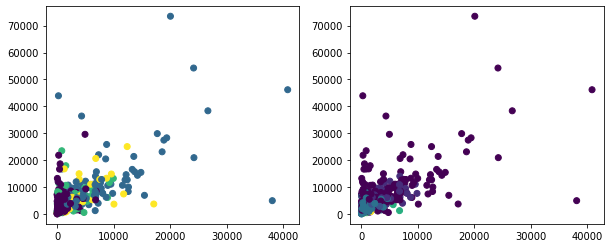

In [77]:
# Your code here:
x = customers.Detergents_Paper
y = customers.Milk

def plot_sales(x,y):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(x, y, c = customers.labels)
    plt.subplot(1,2,2)
    plt.scatter(x, y, c = customers.labels_DBSCAN)
    plt.show()
   
plot_sales(x,y)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

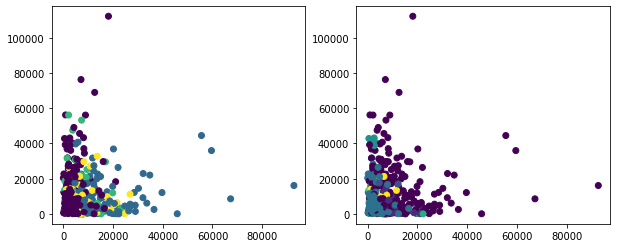

In [78]:
# Your code here:
x = customers.Grocery
y = customers.Fresh
plot_sales(x,y)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

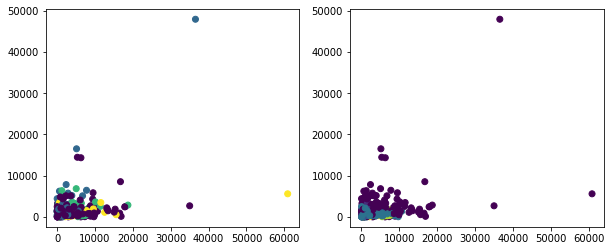

In [79]:
# Your code here:
x = customers.Frozen
y = customers.Delicassen
plot_sales(x,y)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [83]:
# Your code here:
display(customers.groupby('labels').mean())
display(customers.groupby('labels_DBSCAN').mean())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.000000,3.000000,13768.676190,3294.300000,3809.195238,3500.342857,789.290476,1297.214286,1.152381
1,1.991071,2.901786,9897.669643,11581.446429,17088.026786,1889.508929,7506.500000,2250.473214,-0.428571
2,1.180556,1.000000,11444.638889,4545.388889,5816.611111,2985.444444,1752.347222,1294.222222,1.500000
3,1.391304,2.000000,9916.434783,5090.521739,7956.000000,4130.456522,2939.326087,1158.500000,1.434783


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.477833,2.364532,15470.502463,9089.201970,11894.093596,4384.403941,4606.566502,2338.689655,1.226601
0,2.000000,3.000000,4068.971429,8220.371429,12157.371429,843.485714,5262.514286,1425.771429,1.000000
1,2.000000,3.000000,13078.571429,3464.428571,7219.142857,790.571429,3260.142857,315.428571,1.000000
2,1.000000,3.000000,8814.729167,2109.006944,2894.555556,2143.854167,625.451389,750.076389,0.000000
3,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000
4,2.000000,3.000000,80.000000,2458.666667,16894.000000,413.666667,5413.000000,331.000000,1.000000
5,1.000000,1.000000,9918.217391,1769.347826,2364.391304,1600.739130,345.173913,670.260870,2.000000
6,1.000000,1.000000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,2.000000
7,1.000000,2.000000,11414.571429,1625.214286,4361.857143,2337.357143,505.142857,860.928571,3.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here:
# Para mí, en este caso se observa una mayor separación entre grupos usando Kmeans.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [84]:
# Your code here
kMeansModel8 = KMeans(n_clusters=8)
datafit8 = kMeansModel8.fit(customers_scale)
customers['labels_8'] = datafit8.labels_

kMeansModel2 = KMeans(n_clusters=2)
datafit2 = kMeansModel2.fit(customers_scale)
customers['labels_2'] = datafit2.labels_

In [85]:
display(customers.groupby('labels').mean())
display(customers.groupby('labels_8').mean())
display(customers.groupby('labels_2').mean())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN,labels_8,labels_2
labels,,,,,,,,,,,
0,1.000000,3.000000,13768.676190,3294.300000,3809.195238,3500.342857,789.290476,1297.214286,1.152381,1.114286,0.000000
1,1.991071,2.901786,9897.669643,11581.446429,17088.026786,1889.508929,7506.500000,2250.473214,-0.428571,1.428571,0.991071
2,1.180556,1.000000,11444.638889,4545.388889,5816.611111,2985.444444,1752.347222,1294.222222,1.500000,2.902778,0.180556
3,1.391304,2.000000,9916.434783,5090.521739,7956.000000,4130.456522,2939.326087,1158.500000,1.434783,4.043478,0.391304


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_2
labels_8,,,,,,,,,,,
0,1.0,3.000,9068.842105,2989.432749,3448.959064,2201.099415,772.725146,1000.970760,0.000000,1.491228,0.0
1,2.0,3.000,9001.072165,8514.814433,13488.041237,1389.680412,5643.680412,1598.010309,1.000000,-0.340206,1.0
2,1.0,1.000,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542,2.000000,2.050847,0.0
3,2.0,2.700,17988.800000,36037.500000,47380.200000,2895.400000,23449.500000,4083.000000,1.000000,-1.000000,1.0
4,1.4,2.000,9409.755556,4830.666667,7830.000000,2869.600000,2976.377778,1059.600000,3.000000,1.488889,0.4
5,1.0,3.000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,1.000000,-1.000000,0.0
6,1.0,2.975,34334.175000,4934.850000,5594.625000,10488.825000,872.175000,2671.450000,0.075000,-0.350000,0.0
7,2.0,1.000,4793.000000,9752.117647,17223.588235,2457.529412,7567.352941,1813.235294,1.764706,-1.000000,1.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_8
labels_2,,,,,,,,,,,
0,1.0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,0.681208,1.496644,1.580537
1,2.0,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,1.345070,-0.549296,2.239437


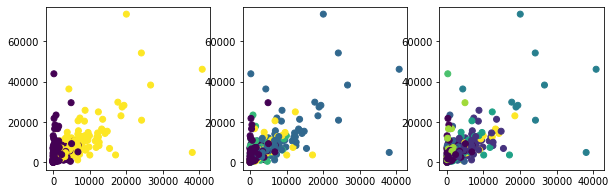

In [101]:
x = customers.Detergents_Paper
y = customers.Milk

def plot_kmeans(x,y):
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.scatter(x, y, c = customers.labels_2)
    plt.subplot(1,3,2)
    plt.scatter(x, y, c = customers.labels)
    plt.subplot(1,3,3)
    plt.scatter(x, y, c = customers.labels_8)
    plt.show()
   
plot_kmeans(x,y)

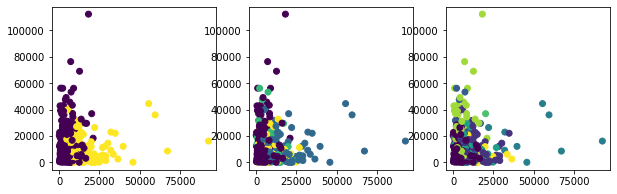

In [102]:
x = customers.Grocery
y = customers.Fresh
plot_kmeans(x,y)

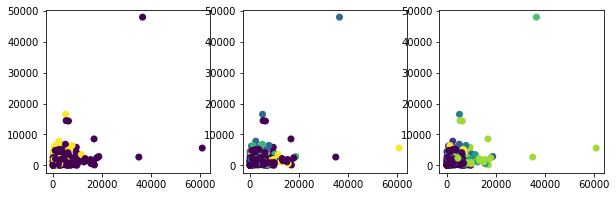

In [103]:
x = customers.Frozen
y = customers.Delicassen
plot_kmeans(x,y)

In [ ]:
# Your comment here
# Habiendo tantas features, yo creo que k=2, de las opciones que he probado, es la 
# que permite apreciar mejor las diferencias. Se observan medias bastante distintas en muchas
# de las features entre un label y el otro (por ejemplo en Fresh, Milk, Grocery, Frozen...),
# incluso quedan los dos chanels separados cada uno en un label, de modo que podemos ver
# qué se vende más en Horeca (Hotel/Restaurant/Cafe) y qué se vende más en or Retail channel.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [112]:
# Your code here
DBSCANModel_2 = DBSCAN(eps=0.7, min_samples=2)
datafitDBSCAN_2 = DBSCANModel_2.fit(customers_scale)
customers['labels_DBSCAN_2'] = datafitDBSCAN_2.labels_

DBSCANModel_3 = DBSCAN(eps=1, min_samples=30)
datafitDBSCAN_3 = DBSCANModel_3.fit(customers_scale)
customers['labels_DBSCAN_3'] = datafitDBSCAN_3.labels_

In [113]:
display(customers.groupby('labels_DBSCAN_2').mean())
display(customers.groupby('labels_DBSCAN').mean())
display(customers.groupby('labels_DBSCAN_3').mean())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_8,labels_2,labels_DBSCAN_3
labels_DBSCAN_2,,,,,,,,,,,,,
-1,1.5125,2.35,21003.812500,12953.712500,16456.137500,6902.837500,6414.962500,3696.475000,1.225,-1.000000,3.662500,0.5125,-0.962500
0,2.0000,3.00,7521.243243,7369.864865,11757.094595,1244.702703,4938.689189,1221.635135,1.000,-0.135135,1.000000,1.0000,-0.027027
1,1.0000,3.00,11206.573034,2555.067416,3204.387640,2568.741573,695.601124,908.544944,0.000,1.539326,0.606742,0.0000,0.910112
2,1.0000,3.00,5148.500000,4220.250000,3488.750000,1399.750000,781.250000,4702.250000,0.000,-1.000000,0.000000,0.0000,0.500000
3,2.0000,3.00,4647.000000,21264.000000,23744.000000,1449.000000,7978.500000,5095.500000,1.000,-1.000000,1.000000,1.0000,-1.000000
4,2.0000,3.00,40200.000000,3930.000000,5415.500000,948.000000,1555.000000,1756.500000,1.000,-1.000000,1.000000,1.0000,-1.000000
5,2.0000,3.00,7905.666667,14354.666667,25310.333333,1747.000000,12659.333333,633.333333,1.000,-1.000000,1.000000,1.0000,-1.000000
6,1.0000,3.00,27992.500000,12129.000000,4896.500000,224.000000,341.500000,869.000000,0.000,-1.000000,0.000000,0.0000,-1.000000
7,2.0000,3.00,1599.500000,10367.000000,20877.000000,987.000000,12107.500000,2645.000000,1.000,-1.000000,1.000000,1.0000,-0.500000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_8,labels_2,labels_DBSCAN_2,labels_DBSCAN_3
labels_DBSCAN,,,,,,,,,,,,,
-1,1.477833,2.364532,15470.502463,9089.201970,11894.093596,4384.403941,4606.566502,2338.689655,1.226601,2.896552,0.477833,2.738916,-0.364532
0,2.000000,3.000000,4068.971429,8220.371429,12157.371429,843.485714,5262.514286,1425.771429,1.000000,1.000000,1.000000,0.000000,0.000000
1,2.000000,3.000000,13078.571429,3464.428571,7219.142857,790.571429,3260.142857,315.428571,1.000000,1.000000,1.000000,0.000000,0.000000
2,1.000000,3.000000,8814.729167,2109.006944,2894.555556,2143.854167,625.451389,750.076389,0.000000,0.083333,0.000000,1.000000,1.000000
3,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000,6.000000,0.000000,1.000000,-0.600000
4,2.000000,3.000000,80.000000,2458.666667,16894.000000,413.666667,5413.000000,331.000000,1.000000,1.000000,1.000000,0.000000,0.000000
5,1.000000,1.000000,9918.217391,1769.347826,2364.391304,1600.739130,345.173913,670.260870,2.000000,2.000000,0.000000,9.000000,2.000000
6,1.000000,1.000000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,2.000000,2.000000,0.000000,9.000000,1.500000
7,1.000000,2.000000,11414.571429,1625.214286,4361.857143,2337.357143,505.142857,860.928571,3.000000,4.000000,0.000000,13.000000,-1.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_8,labels_2,labels_DBSCAN_2
labels_DBSCAN_3,,,,,,,,,,,,,
-1,1.453333,2.22,17934.653333,9436.220000,12816.866667,4945.240000,4891.746667,2511.546667,1.573333,-0.100000,3.806667,0.453333,3.926667
0,2.000000,3.00,7048.081081,7438.472973,11815.351351,1212.013514,5050.635135,1269.716216,1.000000,-0.135135,1.000000,1.000000,0.081081
1,1.000000,3.00,9917.316092,2642.649425,3259.454023,2424.545977,710.862069,963.568966,0.000000,1.505747,0.344828,0.000000,1.005747
2,1.000000,1.00,8161.000000,2968.000000,3203.595238,2340.571429,872.809524,775.976190,2.000000,3.119048,2.000000,0.000000,9.000000


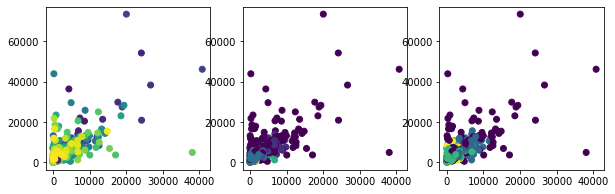

In [104]:
x = customers.Detergents_Paper
y = customers.Milk

def plot_DBSCAN(x,y):
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.scatter(x, y, c = customers.labels_DBSCAN_2)
    plt.subplot(1,3,2)
    plt.scatter(x, y, c = customers.labels_DBSCAN)
    plt.subplot(1,3,3)
    plt.scatter(x, y, c = customers.labels_DBSCAN_3)
    plt.show()
   
plot_DBSCAN(x,y)

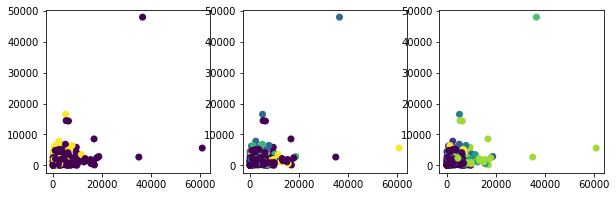

In [105]:
x = customers.Frozen
y = customers.Delicassen
plot_kmeans(x,y)

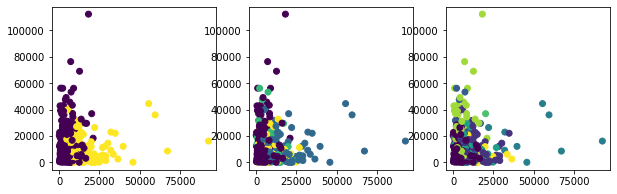

In [106]:
x = customers.Grocery
y = customers.Fresh
plot_kmeans(x,y)

In [ ]:
# Your comment here
# La verdad es que aquí no sabría qué decir... para algunas features veo mejor una opción
# y para otras otra... Quizás me quedaría con la última opción porque, de nuevo, saca un 
# menor número de clústers y facilita la evaluación visual (imagino que cuando evaluemos
# con métricas ya será otra cosa...)